In [ ]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

import statistics as stat
corr_coef = stat.correlation(x,y)
print(corr_coef)

0.4269850802946244


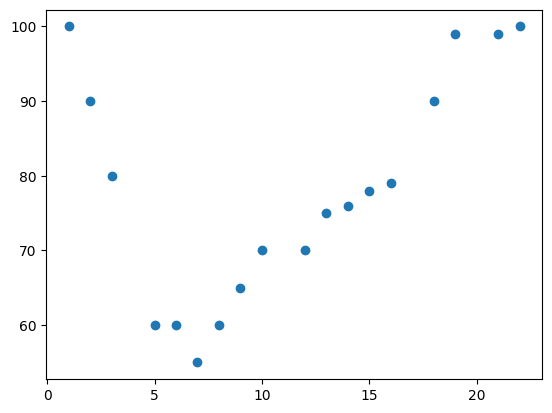

In [ ]:
#we might suspect polynomial correlation
import numpy as np
x = np.array(x)
y = np.array(y)

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly2, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_poly2)

In [ ]:
lr.coef_

array([ 0.        , -6.98709972,  0.35750559])

In [ ]:
lr.intercept_

np.float64(98.20694795449367)

In [ ]:
import pandas as pd
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


In [ ]:
rentals.columns

Index(['Region', 'Condition', 'Rooms', 'Rent', 'Year_Construction', 'Space'], dtype='object')

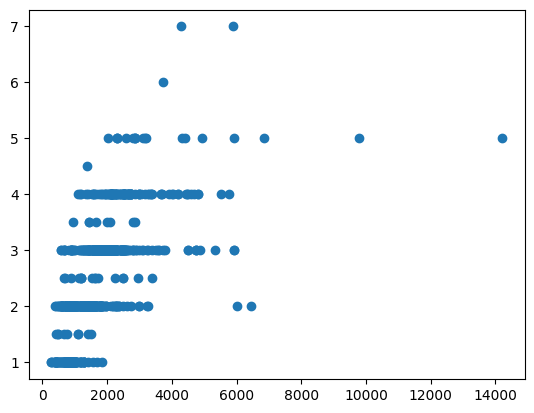

In [ ]:
plt.scatter(rentals.Rent, rentals.Rooms)
plt.show()

In [ ]:
rentals.isnull()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
759,False,False,False,False,False,False
760,False,False,False,False,False,False
761,False,False,False,False,False,False
762,False,False,False,False,False,False


In [ ]:
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [ ]:
rentals.dropna()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27
...,...,...,...,...,...,...
759,Wedding,mint_condition,1.0,959.00,2017,27.80
760,Wedding,mint_condition,1.0,649.00,2017,20.50
761,Wilmersdorf,mint_condition,4.0,2750.00,2017,110.00
762,Köpenick,well_kept,2.0,1259.00,2017,91.20


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rentals['Rent']=scaler.fit_transform(rentals[['Rent']])

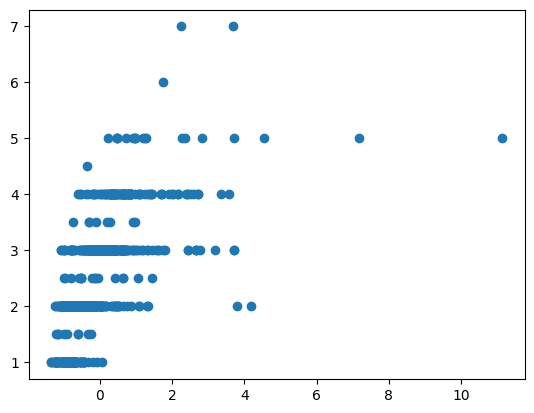

In [ ]:
plt.scatter(rentals.Rent, rentals.Rooms)
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(rentals.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Cleaning')
plt.show()